# Red LSTM

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo 2025

**Versión:** 1.0  



---

## Descripción


Este notebook muestra la creación y entrenamiento de una red LSTM usando el enfoque univariado + single-step

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````



## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [Pre-procesamiento](#scrollTo=vd5lyqNrlfFg)
6. [Creación y entrenamiento del modelo](#scrollTo=016D9eVw3Beb)
7. [Desempeño del modelo](#scrollTo=ZkI9vr5S69i_)
8. [Predicciones con el modelo entrenado](#scrollTo=fvqk4f8L3aXE&line=1&uniqifier=1)
9. [Conclusiones y sugerencias](#scrollTo=0AFY2trj_KLo&line=1&uniqifier=1)

## 1. Introducción

La idea es predecir el comportamiento de la temperatura una hora a futuro (de ahí el término unistep) usando como entrada al modelo sólo el registro histórico de la temperatura (de ahí el término univariado).

##2. El set de datos

Se usará el  [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos que contiene el registro histórico de 14 diferentes variables climáticas en el período entre 2009 y 2015.



##3. El problema a resolver

Crear y entrenar una Red LSTM usando el enfoque univariado + single-step:

![](https://drive.google.com/uc?export=view&id=14gH53G5kjyUCzzveosDD3mtJ5LQ8uLVx)


##4. Lectura del set de datos

In [ ]:
!wget -O weather_dataset_preprocesado.csv https://raw.githubusercontent.com/JaznaLaProfe/Deep-Learning/main/data/weather_dataset_preprocesado.csv

--2025-05-31 21:24:12--  https://raw.githubusercontent.com/JaznaLaProfe/Deep-Learning/main/data/weather_dataset_preprocesado.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5015745 (4.8M) [text/plain]
Saving to: ‘weather_dataset_preprocesado.csv’

weather_dataset_pre 100%[===================>]   4.78M  --.-KB/s    in 0.07s   

2025-05-31 21:24:13 (72.2 MB/s) - ‘weather_dataset_preprocesado.csv’ saved [5015745/5015745]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Leer set de datos
data = pd.read_csv('weather_dataset_preprocesado.csv')
data

,datetime,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50219,2014-09-24 12:00:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50220,2014-09-24 13:00:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50221,2014-09-24 14:00:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50222,2014-09-24 15:00:00,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


##5. Pre-procesamiento

Implica:

1. Partición en train/val/test (80%, 10%, 10%)
2. Generación del dataset supervisado: entrada y salida del modelo
3. Escalamiento

Veamos cada una de estas fases.

### 5.1. Partición del set en entrenamiento, validación y prueba

A diferencia de otros modelos de Machine Learning, en el caso de series de tiempo **se debe garantizar que se generan las particiones sin mezclar aleatoriamente los datos**.

Recordemos además que:
- El set de entrenamiento (*train*) se usará para encontrar los parámetros del modelo
- El set de validación (*val*) para verificar que no haya *under/over-fitting* del modelo y para ajustar sus hiperparámetros
- El set de prueba (*test*) para poner a prueba el mejor modelo encontrado durante el entrenamiento/validación

In [ ]:
# Función para generar las particiones preservando las características
# de la serie de tiempo

def train_val_test_split(serie, tr_size=0.8, vl_size=0.1, ts_size=0.1 ):
    # Definir número de datos en cada subserie
    N = serie.shape[0]
    Ntrain = int(tr_size*N)  # Número de datos de entrenamiento
    Nval = int(vl_size*N)    # Número de datos de validación
    Ntst = N - Ntrain - Nval # Número de datos de prueba

    # Realizar partición
    train = serie[0:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]

    return train, val, test

# Prueba de la función
tr, vl, ts = train_val_test_split(data['T (degC)'])

print(f'Tamaño set de entrenamiento: {tr.shape}')
print(f'Tamaño set de validación: {vl.shape}')
print(f'Tamaño set de prueba: {ts.shape}')

Tamaño set de entrenamiento: (40179,)
Tamaño set de validación: (5022,)
Tamaño set de prueba: (5023,)


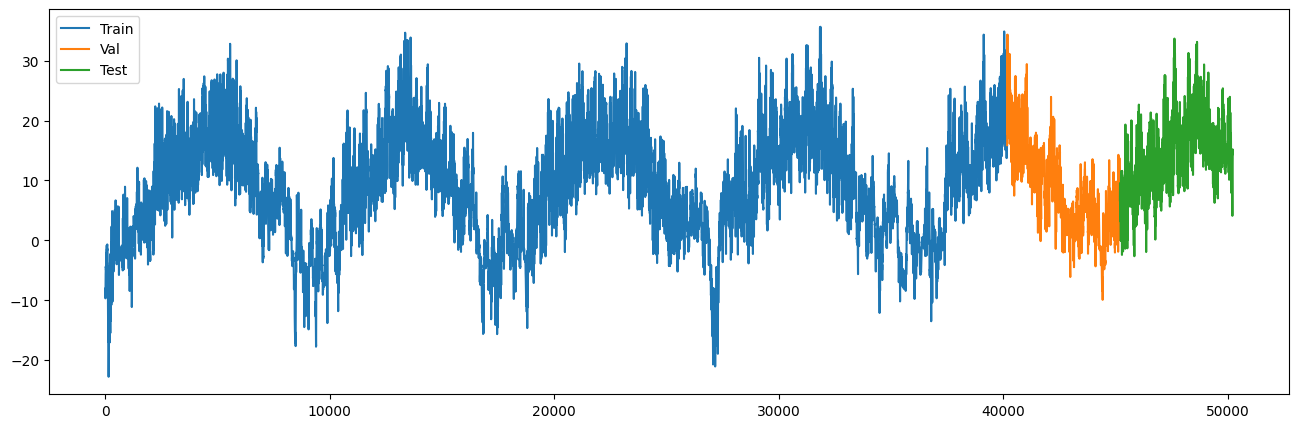

In [ ]:
# Dibujar los subsets
fig, ax = plt.subplots(figsize = (16,5))
ax.plot(tr, label='Train')
ax.plot(vl, label='Val')
ax.plot(ts, label='Test')
plt.legend();

Observemos que por ser un modelo univariado sólo estamos preservando la variable temperatura (y que incluso hemos eliminado la información de fecha y hora de cada registro).

###5.2 Generación del dataset supervisado (entrada y salida del modelo)

Debemos ajustar nuestro set de datos de acuerdo a lo especificado en la [documentación de las Redes LSTM en TensorFlow/Keras](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM):

![](https://drive.google.com/uc?export=view&id=14Sb7zIdjurirW-C6-DWDTvpxOVafTnTK)

Así que en este caso cada dato de entrenamiento será:

- Un arreglo de 24 (horas) x 1 (feature) correspondiente a la entrada
- Un arreglo de 1 (hora) x 1 (feature) correspondiente a la hora 25 (a predecir):

![](https://drive.google.com/uc?export=view&id=1uJeqYz9Hm2Q3LmEpXhZHogOI_rhj7YC2)

Crearemos una función que podremos reutilizar más adelante para implementar modelos más complejos:

In [ ]:
def crear_dataset_supervisado(array, input_length, output_length):
    '''Permite crear un dataset con las entradas (X) y salidas (Y)
    requeridas por la Red LSTM.

    Parámetros:
    - array: arreglo numpy de tamaño N x features (N: cantidad de datos,
      f: cantidad de features)
    - input_length: instantes de tiempo consecutivos de la(s) serie(s) de tiempo
      usados para alimentar el modelo
    - output_length: instantes de tiempo a pronosticar (salida del modelo)
    '''

    # Inicialización
    X, Y = [], []    # Listados que contendrán los datos de entrada y salida del modelo
    shape = array.shape
    if len(shape)==1: # Si se tiene sólo una serie (univariado)
        fils, cols = array.shape[0], 1
        array = array.reshape(fils,cols)
    else: # Multivariado
        fils, cols = array.shape

    # Generar los arreglos
    for i in range(fils-input_length-output_length):
        X.append(array[i:i+INPUT_LENGTH,0:cols])
        Y.append(array[i+input_length:i+input_length+output_length,-1].reshape(output_length,1))

    # Convertir listas a arreglos de NumPy
    X = np.array(X)
    Y = np.array(Y)

    return X, Y

In [ ]:
# Crear los datasets de entrenamiento, prueba y validación y verificar sus tamaños
INPUT_LENGTH = 24    # Posteriormente afinaremos este hiperparámetro
OUTPUT_LENGTH = 1    # Modelo uni-step

x_tr, y_tr = crear_dataset_supervisado(tr.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_vl, y_vl = crear_dataset_supervisado(vl.values, INPUT_LENGTH, OUTPUT_LENGTH)
x_ts, y_ts = crear_dataset_supervisado(ts.values, INPUT_LENGTH, OUTPUT_LENGTH)

# Imprimir información en pantalla
print('Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)')
print(f'Set de entrenamiento - x_tr: {x_tr.shape}, y_tr: {y_tr.shape}')
print(f'Set de validación - x_vl: {x_vl.shape}, y_vl: {y_vl.shape}')
print(f'Set de prueba - x_ts: {x_ts.shape}, y_ts: {y_ts.shape}')

Tamaños entrada (BATCHES x INPUT_LENGTH x FEATURES) y de salida (BATCHES x OUTPUT_LENGTH x FEATURES)
Set de entrenamiento - x_tr: (40154, 24, 1), y_tr: (40154, 1, 1)
Set de validación - x_vl: (4997, 24, 1), y_vl: (4997, 1, 1)
Set de prueba - x_ts: (4998, 24, 1), y_ts: (4998, 1, 1)


###5.3 Escalamiento

Es requerido para garantizar que todas las características se encuentran en el mismo rango de valores, lo que facilita el entrenamiento del modelo y las predicciones:

In [ ]:
def escalar_dataset(data_input):
    '''Escala el dataset en el rango de -1 a 1.

    Entradas:
    data_input: diccionario con los dataset de entrada y salida del modelo
    (data_input = {'x_tr':x_tr, 'y_tr':y_tr, 'x_vl':x_vl, 'y_vl':y_vl,
                    'y_ts':y_ts})

    Retorna:
    - data_scaled: diccionario con los datasets de entrada y salida escalados
      (tiene la misma estructura del diccionario de entrada)
    - scaler: el escalador usado (requerido para las predicciones)
    '''

    NFEATS = data_input['x_tr'].shape[2]

    # Generar listado con "scalers" (en este caso, por ser sólo 1 característica
    # se tendrá sólo 1 escalador)
    scalers = [MinMaxScaler(feature_range=(-1,1)) for i in range(NFEATS)]

    # Arreglos que contendrán los datasets escalados
    x_tr_s = np.zeros(data_input['x_tr'].shape)
    x_vl_s = np.zeros(data_input['x_vl'].shape)
    x_ts_s = np.zeros(data_input['x_ts'].shape)
    y_tr_s = np.zeros(data_input['y_tr'].shape)
    y_vl_s = np.zeros(data_input['y_vl'].shape)
    y_ts_s = np.zeros(data_input['y_ts'].shape)

    # Escalamiento: se usarán los min/max del set de entrenamiento para
    # escalar la totalidad de los datasets

    # Escalamiento Xs: en este caso se debe garantizar que cada dato de entrada
    # a fit_transform o transform debe ser de tamaño nsamples x nfeatures
    # (en este caso 24x13)
    for i in range(NFEATS):
        x_tr_s[:,:,i] = scalers[i].fit_transform(x_tr[:,:,i])
        x_vl_s[:,:,i] = scalers[i].transform(x_vl[:,:,i])
        x_ts_s[:,:,i] = scalers[i].transform(x_ts[:,:,i])

    # Escalamiento Ys
    y_tr_s[:,:,0] = scalers[-1].fit_transform(y_tr[:,:,0])
    y_vl_s[:,:,0] = scalers[-1].transform(y_vl[:,:,0])
    y_ts_s[:,:,0] = scalers[-1].transform(y_ts[:,:,0])

    # Conformar diccionario de salida
    data_scaled = {
        'x_tr_s': x_tr_s, 'y_tr_s': y_tr_s,
        'x_vl_s': x_vl_s, 'y_vl_s': y_vl_s,
        'x_ts_s': x_ts_s, 'y_ts_s': y_ts_s,
    }

    return data_scaled, scalers[0]

In [ ]:
# Escalamiento del dataset con la función anterior

# Crear diccionario de entrada
data_in = {
    'x_tr': x_tr, 'y_tr': y_tr,
    'x_vl': x_vl, 'y_vl': y_vl,
    'x_ts': x_ts, 'y_ts': y_ts,
}

# Y escalar
data_s, scaler = escalar_dataset(data_in)

# Extraer subsets escalados
x_tr_s, y_tr_s = data_s['x_tr_s'], data_s['y_tr_s']
x_vl_s, y_vl_s = data_s['x_vl_s'], data_s['y_vl_s']
x_ts_s, y_ts_s = data_s['x_ts_s'], data_s['y_ts_s']

# Verificación
print(f'Min x_tr/x_vl/x_ts sin escalamiento: {x_tr.min()}/{x_vl.min()}/{x_ts.min()}')
print(f'Min x_tr/x_vl/x_ts con escalamiento: {x_tr_s.min()}/{x_vl_s.min()}/{x_ts_s.min()}')

print(f'\nMin y_tr/y_vl/y_ts sin escalamiento: {y_tr.min()}/{y_vl.min()}/{y_ts.min()}')
print(f'Min y_tr/y_vl/y_ts con escalamiento: {y_tr_s.min()}/{y_vl_s.min()}/{y_ts_s.min()}')

print(f'\nMax x_tr/x_vl/x_ts sin escalamiento: {x_tr.max()}/{x_vl.max()}/{x_ts.max()}')
print(f'Max x_tr/x_vl/x_ts con escalamiento: {x_tr_s.max()}/{x_vl_s.max()}/{x_ts_s.max()}')

print(f'\nMax y_tr/y_vl/y_ts sin escalamiento: {y_tr.max()}/{y_vl.max()}/{y_ts.max()}')
print(f'Max y_tr/y_vl/y_ts con escalamiento: {y_tr_s.max()}/{y_vl_s.max()}/{y_ts_s.max()}')


Min x_tr/x_vl/x_ts sin escalamiento: -22.76/-9.92/-2.64
Min x_tr/x_vl/x_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Min y_tr/y_vl/y_ts sin escalamiento: -22.76/-9.92/-2.64
Min y_tr/y_vl/y_ts con escalamiento: -1.0/-0.5603492552645094/-0.31107687039890414

Max x_tr/x_vl/x_ts sin escalamiento: 35.65/34.34/33.68
Max x_tr/x_vl/x_ts con escalamiento: 1.0000000000000002/0.9551446670090742/0.932545796952577

Max y_tr/y_vl/y_ts sin escalamiento: 35.65/31.33/33.68
Max y_tr/y_vl/y_ts con escalamiento: 1.0000000000000002/0.8520801232665642/0.932545796952577


##6. Creación y entrenamiento del modelo

- Entradas: arreglos *x* (batches x input-length  x features = batches x 24 x 1)
- Salidas: arreglos *y* (batches x output-length x features = batches x 1 x 1)

Usaremos la raíz cuadrada del error cuadrático medio (o RMSE por sus siglas en Inglés: *root mean square error*) como pérdida para entrenar el modelo:

$RMSE = \sqrt{\frac{\sum_i (y_i-\hat{y_i})^2}{N}}$

donde:
- $y$: temperatura real
- $\hat{y}$: temperatura predicha
- $N$: cantidad de predicciones

In [ ]:

# Ajustar parámetros para reproducibilidad del entrenamiento
tf.random.set_seed(123)
tf.config.experimental.enable_op_determinism()

# El modelo
N_UNITS = 128 # Tamaño del estado oculto (h) y de la celda de memoria (c)
INPUT_SHAPE = (x_tr_s.shape[1], x_tr_s.shape[2]) # 24 (horas) x 1 (feature)

modelo = tf.keras.models.Sequential()
modelo.add(tf.keras.layers.Input(shape=INPUT_SHAPE))
modelo.add(tf.keras.layers.LSTM(N_UNITS))
modelo.add(tf.keras.layers.Dense(OUTPUT_LENGTH, activation='linear'))
# activation = 'linear' pues se quiere pronosticar (regresión)

# Pérdida: se usará el RMSE (root mean squared error) para el entrenamiento
# pues permite tener errores en las mismas unidades de la temperatura
def root_mean_squared_error(y_true, y_pred):
    rmse = tf.math.sqrt(tf.math.reduce_mean(tf.square(y_pred-y_true)))
    return rmse

# Compilación
optimizador = tf.keras.optimizers.RMSprop(learning_rate=5e-5)
modelo.compile(
    optimizer = optimizador,
    loss = root_mean_squared_error,
)

# Entrenamiento (aproximadamente 1 min usando GPU)
EPOCHS = 80 # Hiperparámetro
BATCH_SIZE = 256 # Hiperparámetro
historia = modelo.fit(
    x = x_tr_s,
    y = y_tr_s,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_data = (x_vl_s, y_vl_s),
    verbose=2
)

Epoch 1/80
157/157 - 2s - 12ms/step - loss: 0.1654 - val_loss: 0.0923
Epoch 2/80
157/157 - 1s - 6ms/step - loss: 0.1091 - val_loss: 0.0842
Epoch 3/80
157/157 - 1s - 5ms/step - loss: 0.0982 - val_loss: 0.0759
Epoch 4/80
157/157 - 1s - 8ms/step - loss: 0.0851 - val_loss: 0.0658
Epoch 5/80
157/157 - 1s - 8ms/step - loss: 0.0689 - val_loss: 0.0557
Epoch 6/80
157/157 - 1s - 8ms/step - loss: 0.0588 - val_loss: 0.0521
Epoch 7/80
157/157 - 1s - 9ms/step - loss: 0.0557 - val_loss: 0.0499
Epoch 8/80
157/157 - 1s - 6ms/step - loss: 0.0533 - val_loss: 0.0479
Epoch 9/80
157/157 - 1s - 6ms/step - loss: 0.0511 - val_loss: 0.0461
Epoch 10/80
157/157 - 1s - 8ms/step - loss: 0.0491 - val_loss: 0.0445
Epoch 11/80
157/157 - 1s - 8ms/step - loss: 0.0472 - val_loss: 0.0430
Epoch 12/80
157/157 - 1s - 5ms/step - loss: 0.0456 - val_loss: 0.0416
Epoch 13/80
157/157 - 1s - 8ms/step - loss: 0.0442 - val_loss: 0.0404
Epoch 14/80
157/157 - 1s - 5ms/step - loss: 0.0430 - val_loss: 0.0393
Epoch 15/80
157/157 - 1s - 5

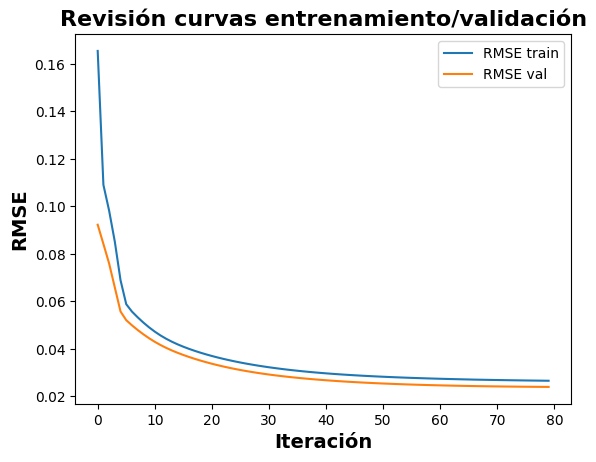

In [ ]:
# Revisión de existencia de overfitting
plt.plot(historia.history['loss'],label='RMSE train')
plt.plot(historia.history['val_loss'],label='RMSE val')
plt.xlabel('Iteración', fontsize=14, fontweight="bold")
plt.ylabel('RMSE', fontsize=14, fontweight="bold")
plt.title("Revisión curvas entrenamiento/validación", fontsize=16, fontweight="bold")
plt.legend();

**Observaciones y sugerencias:**

- El modelo no tiene *overfitting*
- Se sugiere afinar el modelo modificando varios de sus hiperparámetros y usando técnicas como, por ejemplo, *random grid search*. Los hiperparámetros a afinar pueden ser:
  - *INPUT_LENGTH* (esto implica modificar la fase de pre-procesamiento)
  - Número de unidades de la Red LSTM
  - Pérdida
  - Tasa de aprendizaje
  - Epochs
  - Batch size


## 7. Desempeño del modelo

Suponiendo que el modelo ya ha sido afinado y entrenado, se verifica su desempeño para el set de prueba y se compara con el desempeño obtenido con los sets de entrenamiento y validación.

Este desempeño es simplemente el RMSE obtenido con cada subset:

In [ ]:
# Cálculo de rmses para train, val y test
rmse_tr = modelo.evaluate(x=x_tr_s, y=y_tr_s, verbose=0)
rmse_vl = modelo.evaluate(x=x_vl_s, y=y_vl_s, verbose=0)
rmse_ts = modelo.evaluate(x=x_ts_s, y=y_ts_s, verbose=0)

# Imprimir resultados en pantalla
print('Comparativo desempeños:')
print(f'  RMSE train:\t {rmse_tr:.3f}')
print(f'  RMSE val:\t {rmse_vl:.3f}')
print(f'  RMSE test:\t {rmse_ts:.3f}')

Comparativo desempeños:
  RMSE train:	 0.025
  RMSE val:	 0.023
  RMSE test:	 0.028


Los desempeños son comparables lo cual quiere decir que el modelo generaliza bastante bien.

##8. Predicciones con el modelo entrenado

Suponiendo que el modelo ya ha sido afinado, podemos ponerlo a prueba con el set *test*.

In [ ]:
def predecir(x, model, scaler):
    '''Genera la predicción de OUTPUT_LENGTH instantes
    de tiempo a futuro con el modelo entrenado.

    Entrada:
    - x: batch (o batches) de datos para ingresar al modelo
      (tamaño: BATCHES X INPUT_LENGTH X FEATURES)
    - model: Red LSTM entrenada
    - scaler: escalador (requerido para llevar la predicción a la escala original)

    Salida:
    - y_pred: la predicción en la escala original (tamaño: BATCHES X OUTPUT_LENGTH X FEATURES)
    '''

    # Calcular predicción escalada en el rango de -1 a 1
    y_pred_s = model.predict(x,verbose=0)

    # Llevar la predicción a la escala original
    y_pred = scaler.inverse_transform(y_pred_s)

    return y_pred.flatten()

In [ ]:
# Calcular predicciones sobre el set de prueba
y_ts_pred = predecir(x_ts_s, modelo, scaler)

Analicemos este desempeño gráficamente mostrando las temperaturas originales y las predichas por el modelo para cada uno de los 4.998 datos en el set de prueba:

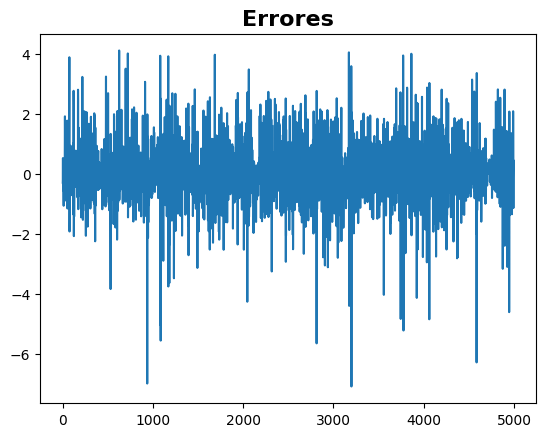

In [ ]:
N = len(y_ts_pred)    # Número de predicciones
ndato = np.linspace(1,N,N)

# Cálculo de errores simples
errores = y_ts.flatten()-y_ts_pred
plt.plot(errores)
plt.title("Errores", fontsize=16, fontweight="bold")
plt.show()

Se observa que:

- El promedio de errores es cercano a cero
- En algunos instantes de tiempo se alcanzan errores extremos de hasta -6 y +4 grados.

Estos errores se podrían reducir al hacer una afinación del modelo o modificando el enfoque de predicción.

## 9. Conclusiones y sugerencias

- Se ha entrenado un primer modelo univariado + uni-step
- Se ha visto los elementos a tener en cuenta para el pre-procesamiento de los datos
- Se ha visto el desempeño del modelo usando los datos de prueba y se ha comparado con lo obtenido para los sets de entrenamiento y validación
- En promedio el modelo tiene un desempeño adecuado (RMSEs relativamente bajos), aunque esto podría mejorar si se afinan sus hiperparámetros.

